# Importing packages and the dataset

In [1]:
# Import the necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
from matplotlib import pyplot as plt

In [2]:
games_df = pd.read_csv('games.csv')
recommendations_df = pd.read_csv('recommendations.csv')
users_df = pd.read_csv('users.csv')

# Combining all the data into a single dataframe

In [3]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Print the head of the DataFrame with all columns visible
print(f'Games Dataframe \n{games_df.head()}')
print(f'\n\nRecommendations Dataframe \n{recommendations_df.head()}')
print(f'\n\nUsers Dataframe \n{users_df.head()}')

Games Dataframe 
   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   22364            BRINK: Agents of Change   2011-08-03  True  False  False   
2  113020       Monaco: What's Yours Is Mine   2013-04-24  True   True   True   
3  226560                 Escape Dead Island   2014-11-18  True  False  False   
4  249050            Dungeon of the ENDLESS™   2014-10-27  True   True  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1       Positive              85            21         2.99            2.99   
2  Very Positive              92          3722        14.99           14.99   
3          Mixed              61           873        14.99           14.99   
4  Very Positive              88          8784        11.99           11.99   

   discount  steam_de

In [4]:
# Print details about the columns
games_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50872 entries, 0 to 50871
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   app_id          50872 non-null  int64  
 1   title           50872 non-null  object 
 2   date_release    50872 non-null  object 
 3   win             50872 non-null  bool   
 4   mac             50872 non-null  bool   
 5   linux           50872 non-null  bool   
 6   rating          50872 non-null  object 
 7   positive_ratio  50872 non-null  int64  
 8   user_reviews    50872 non-null  int64  
 9   price_final     50872 non-null  float64
 10  price_original  50872 non-null  float64
 11  discount        50872 non-null  float64
 12  steam_deck      50872 non-null  bool   
dtypes: bool(4), float64(3), int64(3), object(3)
memory usage: 3.7+ MB


In [5]:
# Change the datatype of columns for optimal memory management
recommendations_df['app_id'] = recommendations_df['app_id'].astype('int32')
recommendations_df['helpful'] = recommendations_df['helpful'].astype('float32')
recommendations_df['funny'] = recommendations_df['funny'].astype('float32')
recommendations_df['hours'] = recommendations_df['hours'].astype('float32')
recommendations_df['user_id'] = recommendations_df['user_id'].astype('float32')
recommendations_df['review_id'] = recommendations_df['review_id'].astype('float32')

# Print the information of recommendations_df
print('\n\n')
print(recommendations_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38354101 entries, 0 to 38354100
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int32  
 1   helpful         float32
 2   funny           float32
 3   date            object 
 4   is_recommended  bool   
 5   hours           float32
 6   user_id         float32
 7   review_id       float32
dtypes: bool(1), float32(5), int32(1), object(1)
memory usage: 1.2+ GB
None


In [6]:
# Check for null values in all columns of games_df
null_columns = games_df.isnull().sum()

# Print columns with null values and their corresponding counts in games_df
print("Columns with null values:")
print(null_columns[null_columns > 0])

Columns with null values:
Series([], dtype: int64)


In [7]:
# Randomly sample 10% of the data from recommendations_df
recommendations_df = recommendations_df.sample(frac=0.1, random_state=1)

In [8]:
# Check for null values in all columns of recommendations_df
null_columns = recommendations_df.isnull().sum()

# Print columns with null values and their corresponding counts
print("Columns with null values:")
print(null_columns[null_columns > 0])

Columns with null values:
Series([], dtype: int64)


In [9]:
# Change the datatype of columns for optimal memory management
users_df['user_id'] = users_df['user_id'].astype('int32')
#users_df['products'] = users_df['products'].astype('int32')
users_df['reviews'] = users_df['reviews'].astype('float32')

# Print the information of users_df
print('\n\n')
print(users_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13786778 entries, 0 to 13786777
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   user_id   int32  
 1   products  int64  
 2   reviews   float32
dtypes: float32(1), int32(1), int64(1)
memory usage: 210.4 MB
None


In [10]:
# Check for null values in all columns
null_columns = users_df.isnull().sum()

# Print columns with null values and their corresponding counts
print("Columns with null values:")
print(null_columns[null_columns > 0])

Columns with null values:
Series([], dtype: int64)


In [11]:
# Merge games_df and recommendations_df on 'app_id'
merged_df = pd.merge(games_df, recommendations_df, on='app_id')

# Print the information of merged_df
print(merged_df.head())
print('\n\n')
print(merged_df.info())

   app_id                              title date_release   win    mac  linux  \
0   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
1   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
2   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
3   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   
4   13500  Prince of Persia: Warrior Within™   2008-11-21  True  False  False   

          rating  positive_ratio  user_reviews  price_final  price_original  \
0  Very Positive              84          2199         9.99            9.99   
1  Very Positive              84          2199         9.99            9.99   
2  Very Positive              84          2199         9.99            9.99   
3  Very Positive              84          2199         9.99            9.99   
4  Very Positive              84          2199         9.99            9.99   

   discount  steam_deck  helpful  funn

In [12]:
# Change the datatype of columns for optimal memory management
merged_df['app_id'] = merged_df['app_id'].astype('int32')
merged_df['positive_ratio'] = merged_df['positive_ratio'].astype('int32')
merged_df['user_reviews'] = merged_df['user_reviews'].astype('int32')
merged_df['price_final'] = merged_df['price_final'].astype('float32')
merged_df['price_original'] = merged_df['price_original'].astype('float32')
merged_df['discount'] = merged_df['discount'].astype('float32')

# Print the information of merged_df
print('\n\n')
print(merged_df.info())




<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3835410 entries, 0 to 3835409
Data columns (total 20 columns):
 #   Column          Dtype  
---  ------          -----  
 0   app_id          int32  
 1   title           object 
 2   date_release    object 
 3   win             bool   
 4   mac             bool   
 5   linux           bool   
 6   rating          object 
 7   positive_ratio  int32  
 8   user_reviews    int32  
 9   price_final     float32
 10  price_original  float32
 11  discount        float32
 12  steam_deck      bool   
 13  helpful         float32
 14  funny           float32
 15  date            object 
 16  is_recommended  bool   
 17  hours           float32
 18  user_id         float32
 19  review_id       float32
dtypes: bool(5), float32(8), int32(3), object(4)
memory usage: 296.3+ MB
None


In [13]:
# Check for null values in all columns
null_columns = merged_df.isnull().sum()

# Print columns with null values and their corresponding counts
print("Columns with null values:")
print(null_columns[null_columns > 0])

Columns with null values:
Series([], dtype: int64)


In [14]:
# Merge the above merged_df with users_df on 'user_id'
final_df = pd.merge(merged_df, users_df, on='user_id')

In [15]:
final_df

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck,helpful,funny,date,is_recommended,hours,user_id,review_id,products,reviews
0,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,0.0,0.0,2021-08-04,True,14.100000,5480030.0,31509970.0,60,9.0
1,438040,Shakes and Fidget,2016-02-24,True,True,False,Very Positive,93,29113,0.00,0.00,0.0,True,0.0,0.0,2017-01-19,True,574.799988,5480030.0,30337720.0,60,9.0
2,440,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.00,0.00,0.0,True,2.0,0.0,2018-09-24,True,357.000000,5480030.0,21459190.0,60,9.0
3,13500,Prince of Persia: Warrior Within™,2008-11-21,True,False,False,Very Positive,84,2199,9.99,9.99,0.0,True,2.0,2.0,2022-12-15,False,1.100000,8906403.0,30948808.0,246,70.0
4,552520,Far Cry® 5,2018-03-26,True,False,False,Very Positive,80,129943,60.00,0.00,0.0,True,0.0,0.0,2021-09-17,True,48.900002,8906403.0,20543918.0,246,70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3835405,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2022-06-16,True,False,True,Very Positive,94,10250,17.00,0.00,0.0,True,0.0,0.0,2022-10-04,True,14.000000,8071034.0,36496784.0,35,1.0
3835406,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2022-06-16,True,False,True,Very Positive,94,10250,17.00,0.00,0.0,True,2.0,0.0,2022-11-22,True,19.500000,11270160.0,21182112.0,520,10.0
3835407,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2022-06-16,True,False,True,Very Positive,94,10250,17.00,0.00,0.0,True,0.0,0.0,2022-11-23,True,9.500000,11973345.0,14910758.0,66,4.0
3835408,1361510,Teenage Mutant Ninja Turtles: Shredder's Revenge,2022-06-16,True,False,True,Very Positive,94,10250,17.00,0.00,0.0,True,0.0,0.0,2022-06-16,True,22.900000,6277221.0,25476116.0,60,1.0


In [16]:
# Check for null values in all columns
null_columns = final_df.isnull().sum()

# Print columns with null values and their corresponding counts
print("Columns with null values:")
print(null_columns[null_columns > 0])

Columns with null values:
Series([], dtype: int64)


In [17]:
# # Sample 10% of the data
# sampled_df = final_df.sample(frac=0.1, random_state=1)

In [18]:
print(final_df.columns)

Index(['app_id', 'title', 'date_release', 'win', 'mac', 'linux', 'rating',
       'positive_ratio', 'user_reviews', 'price_final', 'price_original',
       'discount', 'steam_deck', 'helpful', 'funny', 'date', 'is_recommended',
       'hours', 'user_id', 'review_id', 'products', 'reviews'],
      dtype='object')


#EDA Visulatisations

### Distribution of Ratings

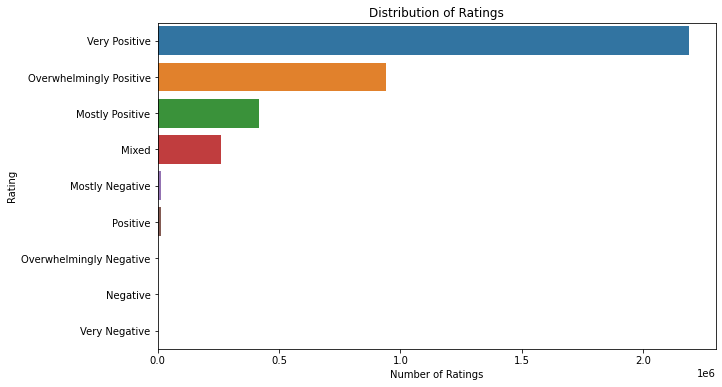

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a 'ratings' column in your dataset
plt.figure(figsize=(10, 6))

# Use horizontal bar plot to allow for longer labels
sns.countplot(y='rating', data=final_df, order=final_df['rating'].value_counts().index)
plt.title('Distribution of Ratings')
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')
plt.show()

### Positive Ratio Distribution:

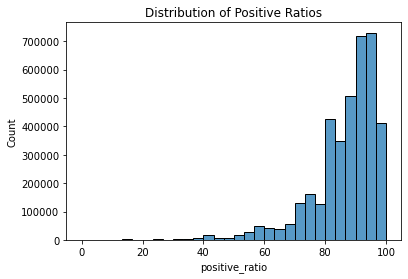

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the histogram
sns.histplot(data=final_df, x='positive_ratio', bins=30)
plt.title('Distribution of Positive Ratios')
plt.show()


### User Reviews Distribution:

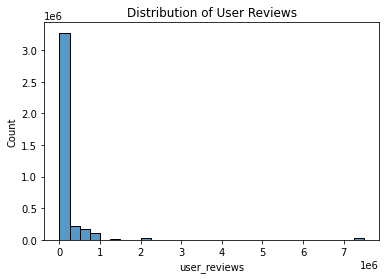

In [21]:
sns.histplot(data=final_df, x='user_reviews', bins=30)
plt.title('Distribution of User Reviews')
plt.show()


### Price Distribution:

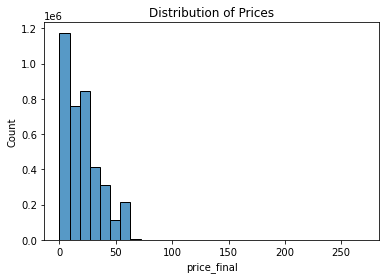

In [22]:
sns.histplot(data=final_df, x='price_final', bins=30)
plt.title('Distribution of Prices')
plt.show()


### Count of Games on Different Platforms:

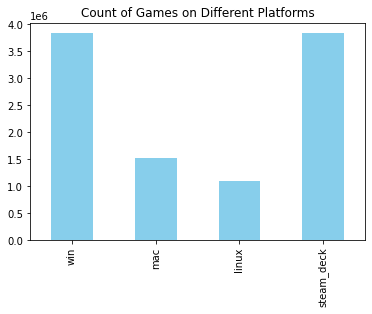

In [23]:
platform_columns = ['win', 'mac', 'linux', 'steam_deck']
platform_counts = final_df[platform_columns].sum()
platform_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Games on Different Platforms')
plt.show()


### Boxplot of Price by Rating:

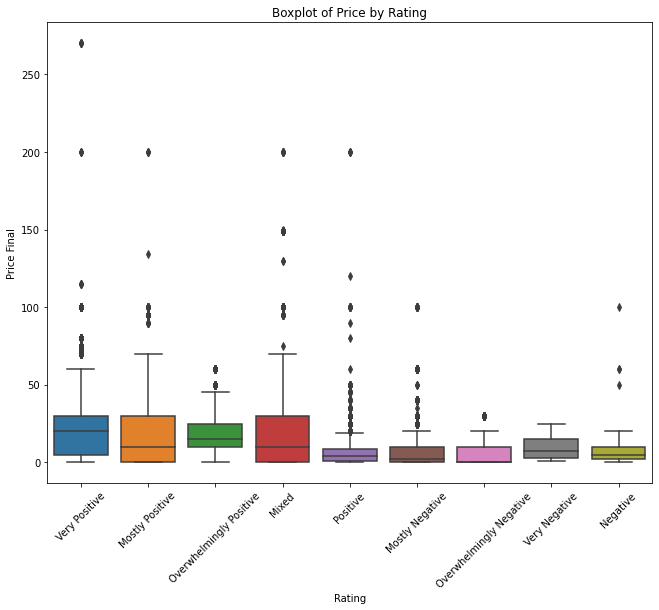

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have 'rating' and 'price_final' columns in your dataset
plt.figure(figsize=(12, 8))  # Adjust the figure size

# Use boxplot with rotated x-axis labels
sns.boxplot(x='rating', y='price_final', data=final_df)
plt.title('Boxplot of Price by Rating')
plt.xlabel('Rating')
plt.ylabel('Price Final')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust subplot parameters to provide more space
plt.subplots_adjust(left=0.2, right=0.9, top=0.9, bottom=0.1)

plt.show()


###  Time Series Analysis:

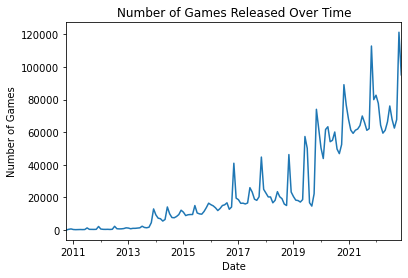

In [25]:
final_df['date'] = pd.to_datetime(final_df['date'])
final_df.set_index('date', inplace=True)
final_df.resample('M').size().plot()
plt.title('Number of Games Released Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Games')
plt.show()

### Distribution of Helpful Votes in Recommendations:

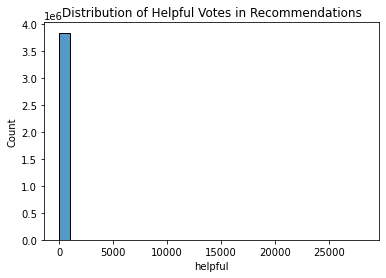

In [26]:
sns.histplot(data=final_df, x='helpful', bins=30)
plt.title('Distribution of Helpful Votes in Recommendations')
plt.show()

### User Products and Reviews Distribution:

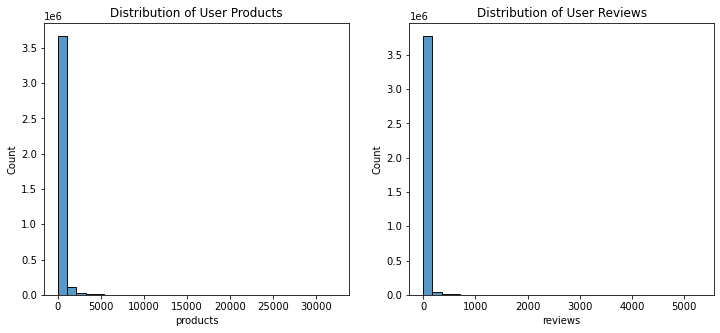

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=final_df, x='products', bins=30, ax=axes[0])
axes[0].set_title('Distribution of User Products')
sns.histplot(data=final_df, x='reviews', bins=30, ax=axes[1])
axes[1].set_title('Distribution of User Reviews')
plt.show()

### Word Cloud for Game Titles:

In [28]:
# from wordcloud import WordCloud

# wordcloud = WordCloud(width=800, height=400, max_words=150, background_color='white').generate(' '.join(final_df['title']))
# plt.figure(figsize=(10, 5))
# plt.imshow(wordcloud, interpolation='bilinear')
# plt.axis('off')
# plt.title('Word Cloud for Game Titles')
# plt.show()

### Pairplot for Selected Features:

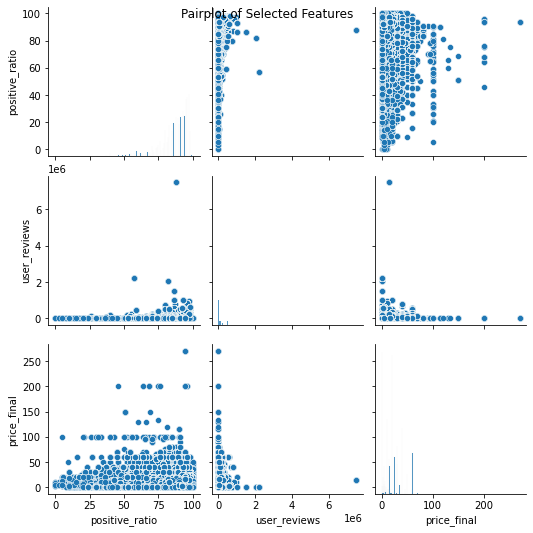

In [29]:
selected_features = ['positive_ratio', 'user_reviews', 'price_final']
sns.pairplot(final_df[selected_features])
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Collaborative Filtering

### SVD

In [30]:
!pip install scikit-surprise

Defaulting to user installation because normal site-packages is not writeable


In [31]:
from surprise import Dataset, Reader
from surprise.model_selection import train_test_split
from surprise import SVD
from surprise import accuracy


In [32]:
from surprise.model_selection import cross_validate
from surprise import accuracy
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Create a Surprise dataset from your final_df
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(final_df[['user_id', 'app_id', 'is_recommended']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build a collaborative filtering model (SVD algorithm)
model_svd = SVD()
model_svd.fit(trainset)

# Make predictions on the test set
predictions = model_svd.test(testset)

# Convert predictions to binary values (0 or 1)
predicted_labels = [1 if pred.est >= 0.5 else 0 for pred in predictions]
true_labels = [int(pred.r_ui) for pred in predictions]

# Calculate and print accuracy, precision, recall, and F1 score
accuracy_value_svd = accuracy_score(true_labels, predicted_labels)
precision_value_svd = precision_score(true_labels, predicted_labels)
recall_value_svd = recall_score(true_labels, predicted_labels)
f1_value_svd = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy_value_svd}")
print(f"Precision: {precision_value_svd}")
print(f"Recall: {recall_value_svd}")
print(f"F1 Score: {f1_value_svd}")

# Cross-validate the model and include precision, recall, and F1 as additional metrics
cv_results_svd = cross_validate(model_svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)
                               # precision_at=[1, 5], recall_at=[1, 5], fcp=True)

rmse_svd = sum(cv_results_svd['test_rmse']) / 5
mae_svd = sum(cv_results_svd['test_mae']) / 5

# Print the average RMSE, MAE, precision, recall, and F1 score across folds
print(f"Average RMSE across folds (SVD): {sum(cv_results_svd['test_rmse']) / 5}")
print(f"Average MAE across folds (SVD): {sum(cv_results_svd['test_mae']) / 5}")

Accuracy: 0.8645281729984539
Precision: 0.8685001624420678
Recall: 0.9927967367034459
F1 Score: 0.9264982147606194
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3254  0.3261  0.3258  0.3256  0.3263  0.3259  0.0003  
MAE (testset)     0.2082  0.2090  0.2085  0.2084  0.2091  0.2086  0.0003  
Fit time          31.95   32.21   32.66   32.87   31.48   32.24   0.50    
Test time         5.85    6.46    5.55    5.77    5.17    5.76    0.42    
Average RMSE across folds (SVD): 0.3258589981505109
Average MAE across folds (SVD): 0.20864573492263064


In [33]:
# Function to get top N recommendations for a user
def get_top_n_recommendations(model, user_id, n=10):
    # Create a testset with the specified user ID
    testset = [(user_id, app_id, 0) for app_id in final_df['app_id'].unique()]

    # Predict ratings for the specified user
    predictions = model.test(testset)

    # Get the top N recommendations for the specified user
    top_n = sorted(predictions, key=lambda x: x.est, reverse=True)[:n]

    return top_n

game_id_to_name_mapping = dict(zip(final_df['app_id'], final_df['title']))

user_id_to_recommend = 12517638
user_recommendations = get_top_n_recommendations(model_svd, user_id_to_recommend, n=10)

# Print the top recommendations for the specified user in a more readable format
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for prediction in user_recommendations:
    app_id = prediction.iid
    est = prediction.est
    game_name = game_id_to_name_mapping.get(app_id, "Unknown Game")
    print(f"  Game Name: {game_name}, App ID: {app_id}")

Top 10 recommendations for user 12517638:
  Game Name: Quadrilateral Cowboy, App ID: 240440
  Game Name: Bleed 2, App ID: 396350
  Game Name: Putt-Putt® Goes to the Moon, App ID: 294650
  Game Name: Cats in Time, App ID: 1599880
  Game Name: Super Bit Blaster XL, App ID: 865040
  Game Name: Zombie Estate 2, App ID: 512490
  Game Name: SUPER CHICKEN JUMPER, App ID: 584640
  Game Name: Blackwell Epiphany, App ID: 236930
  Game Name: Enigmatis 2: The Mists of Ravenwood, App ID: 284770
  Game Name: Primordia, App ID: 227000


### Slope One

In [34]:
from surprise import SlopeOne
from surprise.model_selection import cross_validate
from surprise import Dataset
from surprise.model_selection import train_test_split
import pandas as pd

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build the SlopeOne collaborative filtering model
slope_one_model = SlopeOne()
slope_one_model.fit(trainset)

# Predict ratings for the test set
predictions = slope_one_model.test(testset)

# Convert predictions to binary values (0 or 1)
predicted_labels = [1 if pred.est >= 0.5 else 0 for pred in predictions]
true_labels = [int(pred.r_ui) for pred in predictions]

# Calculate and print accuracy, precision, recall, and F1 score
accuracy_value_slope_one = accuracy_score(true_labels, predicted_labels)
precision_value_slope_one = precision_score(true_labels, predicted_labels)
recall_value_slope_one = recall_score(true_labels, predicted_labels)
f1_value_slope_one = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy_value_slope_one}")
print(f"Precision: {precision_value_slope_one}")
print(f"Recall: {recall_value_slope_one}")
print(f"F1 Score: {f1_value_slope_one}")

# Cross-validate the model
cv_results_slope_one = cross_validate(slope_one_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

rmse_slope_one = sum(cv_results_slope_one['test_rmse']) / 5
mae_slope_one = sum(cv_results_slope_one['test_mae']) / 5

print(f"Average RMSE across folds (SlopeOne CF): {sum(cv_results_slope_one['test_rmse']) / 5}")
print(f"Average MAE across folds (SlopeOne CF): {sum(cv_results_slope_one['test_mae']) / 5}")

Accuracy: 0.8432553494932745
Precision: 0.8709483554128967
Recall: 0.9599864180894072
F1 Score: 0.9133024334388006
Evaluating RMSE, MAE of algorithm SlopeOne on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3712  0.3717  0.3718  0.3713  0.3716  0.3715  0.0002  
MAE (testset)     0.2352  0.2357  0.2355  0.2354  0.2354  0.2354  0.0001  
Fit time          27.54   33.06   26.88   27.29   24.71   27.90   2.77    
Test time         7.83    8.38    6.80    6.71    5.99    7.14    0.85    
Average RMSE across folds (SlopeOne CF): 0.37152444795003464
Average MAE across folds (SlopeOne CF): 0.23544598108406314


In [35]:
user_id_to_recommend = 12517638
user_recommendations = get_top_n_recommendations(slope_one_model, user_id_to_recommend, n=10)

# Print the top recommendations for the specified user in a more readable format
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for prediction in user_recommendations:
    app_id = prediction.iid
    est = prediction.est
    game_name = game_id_to_name_mapping.get(app_id, "Unknown Game")
    print(f"  Game Name: {game_name}, App ID: {app_id}")

Top 10 recommendations for user 12517638:
  Game Name: Prince of Persia: Warrior Within™, App ID: 13500
  Game Name: Shakes and Fidget, App ID: 438040
  Game Name: Team Fortress 2, App ID: 440
  Game Name: Far Cry® 5, App ID: 552520
  Game Name: Alan Wake, App ID: 108710
  Game Name: Red Dead Redemption 2, App ID: 1174180
  Game Name: Call of Duty® 2, App ID: 2630
  Game Name: Assassin's Creed® Origins, App ID: 582160
  Game Name: Dishonored 2, App ID: 403640
  Game Name: Hitman: Codename 47, App ID: 6900


### User- User model based on KNN

In [36]:
!pip install mlxtend

Defaulting to user installation because normal site-packages is not writeable


In [37]:
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from scipy.sparse import csr_matrix
from mlxtend.frequent_patterns import apriori, association_rules

In [38]:
from scipy.sparse import coo_matrix

# map each user and item to a unique numeric value
user_ids = final_df['user_id'].astype('category').cat.codes
item_ids = final_df['app_id'].astype('category').cat.codes

# Get the unique user and game ids
unique_user_ids = final_df['user_id'].astype('category').cat.categories
unique_item_ids = final_df['app_id'].astype('category').cat.categories

# create a sparse matrix
user_game_matrix = coo_matrix((final_df['hours'], (user_ids, item_ids)))

# Fit the model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_game_matrix)

# Get top 10 recommendations for first user
distances, indices = model_knn.kneighbors(user_game_matrix.getrow(0), n_neighbors=11)  # Set n_neighbors to 11
recommended_users = [unique_user_ids[i] for i in indices.flatten()[1:]]
print(f'Recommended users for the first user are: {recommended_users}')

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recommended users for the first user are: [7136535.0, 11174408.0, 10074228.0, 94400.0, 3366927.0, 7994431.0, 7171348.0, 8233687.0, 11351485.0, 5800625.0]


In [39]:
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import coo_matrix

# map each user and item to a unique numeric value
user_ids = final_df['user_id'].astype('category').cat.codes
item_ids = final_df['app_id'].astype('category').cat.codes

# Get the unique user and game ids
unique_user_ids = final_df['user_id'].astype('category').cat.categories
unique_item_ids = final_df['app_id'].astype('category').cat.categories

# create a sparse matrix
user_game_matrix = coo_matrix((final_df['hours'], (user_ids, item_ids)))

# Fit the model
model_knn = NearestNeighbors(metric='cosine', algorithm='brute', n_jobs=-1)
model_knn.fit(user_game_matrix.T)  # Transpose the matrix to switch roles of users and items

# Get top 10 recommendations for the first user
distances, indices = model_knn.kneighbors(user_game_matrix.getcol(0).T, n_neighbors=11)  # Set n_neighbors to 11
recommended_users = [unique_user_ids[i] for i in indices.flatten()[1:]]
print(f'Recommended users for the first user are: {recommended_users}')

recommended_games = [unique_item_ids[i] for i in indices.flatten()[1:]]

# Map game IDs to game names
recommended_game_names = [final_df[final_df['app_id'] == app_id]['title'].iloc[0] for app_id in recommended_games]

print(f'Recommended games for the first user are: {recommended_game_names}')


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Recommended users for the first user are: [69484.0, 13285.0, 27512.0, 34347.0, 29361.0, 42078.0, 44936.0, 42879.0, 75815.0, 15592.0]
Recommended games for the first user are: ['BrainPower', 'Nicolas Eymerich The Inquisitor Book II : The Village', 'Fill Up!', 'Half-Life: A Place in the West', 'Plastiland', 'Train Mechanic Simulator 2017', 'Pandarama: The Lost Toys', 'The Land of Dasthir', '校园恋物语|Love in School', 'Kings of Kung Fu']


## Matrix Factorization-Based Collaborative Filtering

### Alternating Least Squares (ALS) - Novel Feature

In [40]:
from surprise import SVD
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate

reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(final_df[['user_id', 'app_id', 'is_recommended']], reader)

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Build a collaborative filtering model (ALS algorithm)
als_model = SVD(biased=False, n_epochs=20, lr_all=0.005, reg_all=0.02)
als_model.fit(trainset)

# Predict ratings for the test set
predictions = als_model.test(testset)

# Convert predictions to binary values (0 or 1)
predicted_labels = [1 if pred.est >= 0.5 else 0 for pred in predictions]
true_labels = [int(pred.r_ui) for pred in predictions]

# Calculate and print accuracy, precision, recall, and F1 score
accuracy_value_als = accuracy_score(true_labels, predicted_labels)
precision_value_als = precision_score(true_labels, predicted_labels)
recall_value_als = recall_score(true_labels, predicted_labels)
f1_value_als = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy_value_als}")
print(f"Precision: {precision_value_als}")
print(f"Recall: {recall_value_als}")
print(f"F1 Score: {f1_value_als}")

# Cross-validate the model
cv_results_als = cross_validate(als_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

rmse_als = sum(cv_results_als['test_rmse']) / 5
mae_als = sum(cv_results_als['test_mae']) / 5

# Print the average RMSE and MAE
print(f"Average RMSE across folds (ALS): {sum(cv_results_als['test_rmse']) / 5}")
print(f"Average MAE across folds (ALS): {sum(cv_results_als['test_mae']) / 5}")

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.6026370062131559
Precision: 0.8705775475894619
Recall: 0.6318968744931416
F1 Score: 0.7322789968872306
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.5877  0.5871  0.5872  0.5876  0.5870  0.5873  0.0003  
MAE (testset)     0.4431  0.4423  0.4425  0.4429  0.4422  0.4426  0.0004  
Fit time          33.31   32.28   31.95   32.48   31.15   32.24   0.70    
Test time         5.26    4.26    4.25    4.50    4.21    4.49    0.40    
Average RMSE across folds (ALS): 0.5873322860300132
Average MAE across folds (ALS): 0.4426075381968042


In [41]:
user_id_to_recommend = 12517638
user_recommendations = get_top_n_recommendations(als_model, user_id_to_recommend, n=10)

# Print the top recommendations for the specified user in a more readable format
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for prediction in user_recommendations:
    app_id = prediction.iid
    est = prediction.est
    game_name = game_id_to_name_mapping.get(app_id, "Unknown Game")
    print(f"  Game Name: {game_name}, App ID: {app_id}")

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 recommendations for user 12517638:
  Game Name: Prince of Persia: Warrior Within™, App ID: 13500
  Game Name: Shakes and Fidget, App ID: 438040
  Game Name: Team Fortress 2, App ID: 440
  Game Name: Far Cry® 5, App ID: 552520
  Game Name: Alan Wake, App ID: 108710
  Game Name: Red Dead Redemption 2, App ID: 1174180
  Game Name: Call of Duty® 2, App ID: 2630
  Game Name: Assassin's Creed® Origins, App ID: 582160
  Game Name: Dishonored 2, App ID: 403640
  Game Name: Hitman: Codename 47, App ID: 6900


### Non-Negative Matrix Factorization (NMF)

In [42]:
from surprise.model_selection import cross_validate
from surprise import NMF

# Build a collaborative filtering model (NMF algorithm)
nmf_model = NMF()
nmf_model.fit(trainset)

# Predict ratings for the test set
predictions = nmf_model.test(testset)

# Convert predictions to binary values (0 or 1)
predicted_labels = [1 if pred.est >= 0.5 else 0 for pred in predictions]
true_labels = [int(pred.r_ui) for pred in predictions]

# Calculate and print accuracy, precision, recall, and F1 score
accuracy_value_nmf = accuracy_score(true_labels, predicted_labels)
precision_value_nmf = precision_score(true_labels, predicted_labels)
recall_value_nmf = recall_score(true_labels, predicted_labels)
f1_value_nmf = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy_value_nmf}")
print(f"Precision: {precision_value_nmf}")
print(f"Recall: {recall_value_nmf}")
print(f"F1 Score: {f1_value_nmf}")

# Cross-validate the model
cv_results_nmf = cross_validate(nmf_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

rmse_nmf = sum(cv_results_nmf['test_rmse']) / 5
mae_nmf = sum(cv_results_nmf['test_mae']) / 5

# Print the average RMSE and MAE
print(f"Average RMSE across folds (NMF): {sum(cv_results_nmf['test_rmse']) / 5}")
print(f"Average MAE across folds (NMF): {sum(cv_results_nmf['test_mae']) / 5}")


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.8445615983688837
Precision: 0.8732914226828618
Recall: 0.9583038376476616
F1 Score: 0.9138247295865488
Evaluating RMSE, MAE of algorithm NMF on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3668  0.3672  0.3668  0.3675  0.3668  0.3670  0.0003  
MAE (testset)     0.2671  0.2675  0.2669  0.2676  0.2671  0.2673  0.0003  
Fit time          132.28  131.55  131.82  131.43  130.20  131.46  0.69    
Test time         5.53    4.69    4.75    4.51    4.41    4.78    0.39    
Average RMSE across folds (NMF): 0.367025247858495
Average MAE across folds (NMF): 0.26725138101917817


In [43]:
user_id_to_recommend = 12517638
user_recommendations = get_top_n_recommendations(nmf_model, user_id_to_recommend, n=10)

# Print the top recommendations for the specified user in a more readable format
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for prediction in user_recommendations:
    app_id = prediction.iid
    est = prediction.est
    game_name = game_id_to_name_mapping.get(app_id, "Unknown Game")
    print(f"  Game Name: {game_name}, App ID: {app_id}")

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 recommendations for user 12517638:
  Game Name: Prince of Persia: Warrior Within™, App ID: 13500
  Game Name: Shakes and Fidget, App ID: 438040
  Game Name: Team Fortress 2, App ID: 440
  Game Name: Far Cry® 5, App ID: 552520
  Game Name: Alan Wake, App ID: 108710
  Game Name: Red Dead Redemption 2, App ID: 1174180
  Game Name: Call of Duty® 2, App ID: 2630
  Game Name: Assassin's Creed® Origins, App ID: 582160
  Game Name: Dishonored 2, App ID: 403640
  Game Name: Hitman: Codename 47, App ID: 6900


## Memory-Based Collaborative Filtering:

### Item-Based Collaborative Filtering:

In [44]:
from surprise import KNNBasic

# Build a collaborative filtering model (Item-Based k-NN algorithm)
item_based_model = KNNBasic(sim_options={'user_based': False}, verbose=1)
item_based_model.fit(trainset)

# Predict ratings for the test set
predictions = item_based_model.test(testset)

# Convert predictions to binary values (0 or 1)
predicted_labels = [1 if pred.est >= 0.5 else 0 for pred in predictions]
true_labels = [int(pred.r_ui) for pred in predictions]

# Calculate and print accuracy, precision, recall, and F1 score
accuracy_value_item_based = accuracy_score(true_labels, predicted_labels)
precision_value_item_based = precision_score(true_labels, predicted_labels)
recall_value_item_based = recall_score(true_labels, predicted_labels)
f1_value_item_based = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy_value_item_based}")
print(f"Precision: {precision_value_item_based}")
print(f"Recall: {recall_value_item_based}")
print(f"F1 Score: {f1_value_item_based}")

# Cross-validate the model
cv_results_item_based = cross_validate(item_based_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

rmse_item_based = sum(cv_results_item_based['test_rmse']) / 5
mae_item_based = sum(cv_results_item_based['test_mae']) / 5

# Print the average RMSE and MAE
print(f"Average RMSE across folds (Item-Based CF): {sum(cv_results_item_based['test_rmse']) / 5}")
print(f"Average MAE across folds (Item-Based CF): {sum(cv_results_item_based['test_mae']) / 5}")


Computing the msd similarity matrix...


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Done computing similarity matrix.
Accuracy: 0.8485038105443746
Precision: 0.8663419526787556
Recall: 0.9741322205059565
F1 Score: 0.9170806332154106
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3658  0.3663  0.3666  0.3662  0.3655  0.3661  0.0004  
MAE (testset)     0.2289  0.2293  0.2295  0.2293  0.2288  0.2292  0.0003  
Fit time          15.20   13.17   16.06   14.88   13.26   14.51   1.13    
Test time         7.90    8.31    7.74    6.72    6.16    7.37    0.80    
Average RMSE across folds (Item-Based CF): 0.36607516470342416
Average MAE across folds (Item-Based CF): 0.22915778496240521


In [45]:
user_id_to_recommend = 12517638
user_recommendations = get_top_n_recommendations(item_based_model, user_id_to_recommend, n=10)

# Print the top recommendations for the specified user in a more readable format
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for prediction in user_recommendations:
    app_id = prediction.iid
    est = prediction.est
    game_name = game_id_to_name_mapping.get(app_id, "Unknown Game")
    print(f"  Game Name: {game_name}, App ID: {app_id}")

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 recommendations for user 12517638:
  Game Name: Prince of Persia: Warrior Within™, App ID: 13500
  Game Name: Shakes and Fidget, App ID: 438040
  Game Name: Team Fortress 2, App ID: 440
  Game Name: Far Cry® 5, App ID: 552520
  Game Name: Alan Wake, App ID: 108710
  Game Name: Red Dead Redemption 2, App ID: 1174180
  Game Name: Call of Duty® 2, App ID: 2630
  Game Name: Assassin's Creed® Origins, App ID: 582160
  Game Name: Dishonored 2, App ID: 403640
  Game Name: Hitman: Codename 47, App ID: 6900


## Model-Based Collaborative Filtering

### BaselineOnly

In [46]:
from surprise import BaselineOnly

# Build a collaborative filtering model (BaselineOnly algorithm)
baseline_model = BaselineOnly(verbose=1)
baseline_model.fit(trainset)

# Predict ratings for the test set
predictions = baseline_model.test(testset)

# Convert predictions to binary values (0 or 1)
predicted_labels = [1 if pred.est >= 0.5 else 0 for pred in predictions]
true_labels = [int(pred.r_ui) for pred in predictions]

# Calculate and print accuracy, precision, recall, and F1 score
accuracy_value_baseline = accuracy_score(true_labels, predicted_labels)
precision_value_baseline = precision_score(true_labels, predicted_labels)
recall_value_baseline = recall_score(true_labels, predicted_labels)
f1_value_baseline = f1_score(true_labels, predicted_labels)

print(f"Accuracy: {accuracy_value_baseline}")
print(f"Precision: {precision_value_baseline}")
print(f"Recall: {recall_value_baseline}")
print(f"F1 Score: {f1_value_baseline}")

cv_results_baseline = cross_validate(baseline_model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True, n_jobs=-1)

rmse_baseline = sum(cv_results_baseline['test_rmse']) / 5
mae_baseline = sum(cv_results_baseline['test_mae']) / 5

print(f"Average RMSE across folds (BaselineOnly): {sum(cv_results_baseline['test_rmse']) / 5}")
print(f"Average MAE across folds (BaselineOnly): {sum(cv_results_baseline['test_mae']) / 5}")

Estimating biases using als...


/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Accuracy: 0.8641279550295796
Precision: 0.8674852470295589
Recall: 0.9938259908655588
F1 Score: 0.9263677859328384
Evaluating RMSE, MAE of algorithm BaselineOnly on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3252  0.3248  0.3254  0.3247  0.3253  0.3251  0.0003  
MAE (testset)     0.2116  0.2115  0.2118  0.2114  0.2118  0.2116  0.0001  
Fit time          6.11    6.20    6.20    6.33    5.84    6.14    0.16    
Test time         3.88    3.98    4.33    3.15    3.07    3.68    0.49    
Average RMSE across folds (BaselineOnly): 0.3250579806317162
Average MAE across folds (BaselineOnly): 0.2116221817853378


In [47]:
user_id_to_recommend = 12517638
user_recommendations = get_top_n_recommendations(baseline_model, user_id_to_recommend, n=10)

# Print the top recommendations for the specified user in a more readable format
print(f"Top 10 recommendations for user {user_id_to_recommend}:")
for prediction in user_recommendations:
    app_id = prediction.iid
    est = prediction.est
    game_name = game_id_to_name_mapping.get(app_id, "Unknown Game")
    print(f"  Game Name: {game_name}, App ID: {app_id}")

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Top 10 recommendations for user 12517638:
  Game Name: Primordia, App ID: 227000
  Game Name: TOEM, App ID: 1307580
  Game Name: Before Your Eyes, App ID: 1082430
  Game Name: Terraria, App ID: 105600
  Game Name: Word Game: Episode 0, App ID: 1507970
  Game Name: Senren＊Banka, App ID: 1144400
  Game Name: Kind Words (lo fi chill beats to write to), App ID: 1070710
  Game Name: A Short Hike, App ID: 1055540
  Game Name: planetarian HD, App ID: 623080
  Game Name: The Pedestrian, App ID: 466630


## Addressing bias and fairness

### AIF360 toolkit for algorithmic fairness

In [51]:
!pip install aif360[LawSchoolGPA]
!pip install aif360[Reductions]

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 535 kB 15.8 MB/s eta 0:00:01
Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 231 kB 9.9 MB/s eta 0:00:01


In [52]:
from aif360.algorithms.preprocessing import Reweighing
from surprise.model_selection import cross_validate
from surprise import SVD
from surprise import Dataset, Reader
from aif360.datasets import StandardDataset

# Assuming 'final_df' is your merged DataFrame

# Step 1: Load your data using Surprise
reader = Reader(rating_scale=(0, 1))
data = Dataset.load_from_df(final_df[['user_id', 'app_id', 'is_recommended']], reader)

# Step 2: Train your recommendation model (e.g., SVD)
model = SVD()
cross_validate(model, data, measures=['RMSE'], cv=5, verbose=True)

# Step 3: Preprocess the data for fairness using aif360
# Select only relevant numerical columns for fairness preprocessing
numerical_cols = ['user_id', 'app_id', 'is_recommended', 'steam_deck']

# Convert 'final_df' to an aif360 DataFrame
dataset_aif360 = StandardDataset(
    df=final_df[numerical_cols],
    label_name='is_recommended',
    favorable_classes=[1],
    protected_attribute_names=['steam_deck'],
    privileged_classes=[[True]],
)

# Use AIF360 to reweigh the data for fairness mitigation
privileged_groups = [{'steam_deck': True}]  # Define the privileged group
unprivileged_groups = [{'steam_deck': False}]  # Define the unprivileged group

reweighing = Reweighing(unprivileged_groups=unprivileged_groups, privileged_groups=privileged_groups)
reweighted_dataset = reweighing.fit_transform(dataset_aif360)

# Now you can train your recommendation model on the reweighted data
reweighted_df, _ = reweighted_dataset.convert_to_dataframe()
reweighted_data = Dataset.load_from_df(reweighted_df[['user_id', 'app_id', 'is_recommended']], reader)
cross_validate(model, reweighted_data, measures=['RMSE'], cv=5, verbose=True)

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3252  0.3260  0.3262  0.3262  0.3262  0.3260  0.0004  
Fit time          47.86   50.22   50.75   51.38   51.22   50.29   1.28    
Test time         4.95    5.06    5.08    5.08    5.13    5.06    0.06    
Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.3256  0.3263  0.3255  0.3260  0.3260  0.3259  0.0003  
Fit time          49.58   50.88   49.22   51.04   49.52   50.05   0.76    
Test time         10.66   10.50   10.72   5.24    5.25    8.48    2.64    


{'test_rmse': array([0.32555429, 0.32630627, 0.32546201, 0.32604719, 0.32598973]),
 'fit_time': (49.58022689819336,
  50.88306188583374,
  49.221858978271484,
  51.040735960006714,
  49.52497696876526),
 'test_time': (10.661632776260376,
  10.498505353927612,
  10.72238540649414,
  5.243840456008911,
  5.25364351272583)}

 The lower RMSE values and consistent performance across folds (low standard deviation) suggest that the collaborative filtering model, specifically SVD, is performing well in making accurate predictions. The fit time and test time values provide insights into the computational efficiency of the model.

## Visualization of results

### Accuracy values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


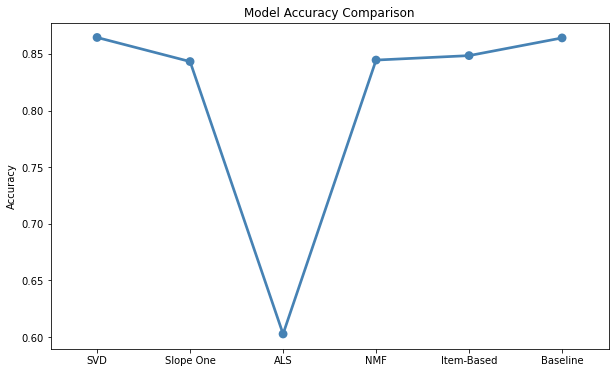

In [53]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their accuracy values
models = ['SVD', 'Slope One', 'ALS', 'NMF', 'Item-Based', 'Baseline']
accuracies = [accuracy_value_svd, accuracy_value_slope_one, accuracy_value_als, accuracy_value_nmf, accuracy_value_item_based, accuracy_value_baseline]

# Create a point plot with error bars
plt.figure(figsize=(10, 6))
sns.pointplot(x=models, y=accuracies, color='steelblue')
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


### Precision values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


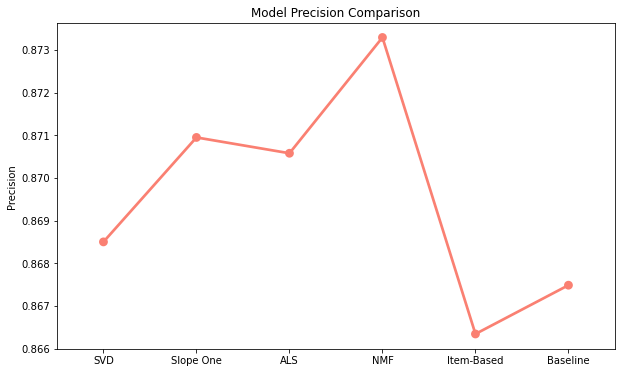

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their precision values
models = ['SVD', 'Slope One', 'ALS', 'NMF', 'Item-Based', 'Baseline']
precisions = [precision_value_svd, precision_value_slope_one, precision_value_als, precision_value_nmf, precision_value_item_based, precision_value_baseline]

# Create a point plot with error bars
plt.figure(figsize=(10, 6))
sns.pointplot(x=models, y=precisions, color='salmon', ci="sd")  # Use 'ci' for error bars
plt.title('Model Precision Comparison')
plt.ylabel('Precision')
plt.show()



### Recall values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


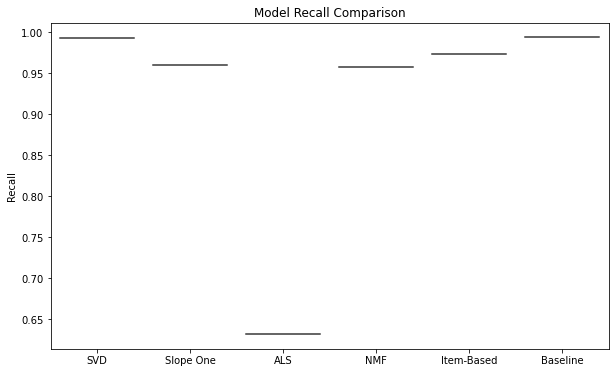

In [55]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their recall values
models = ['SVD', 'Slope One', 'ALS', 'NMF', 'Item-Based', 'Baseline']
recalls = [recall_value_svd, recall_value_slope_one, recall_value_als, recall_value_nmf, recall_value_item_based, recall_value_baseline]

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=models, y=recalls, palette="viridis")
plt.title('Model Recall Comparison')
plt.ylabel('Recall')
plt.show()

### F1 values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


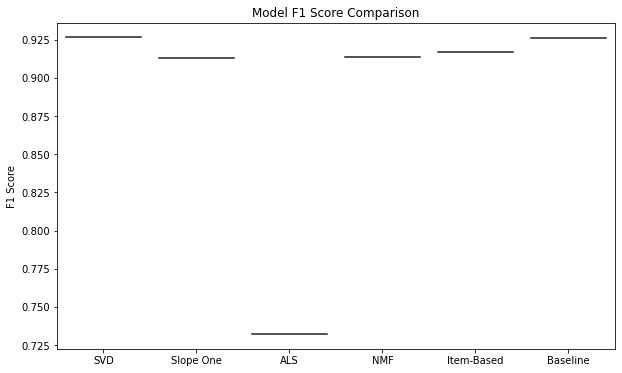

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their F1 scores
models = ['SVD', 'Slope One', 'ALS', 'NMF', 'Item-Based', 'Baseline']
f1_scores = [f1_value_svd, f1_value_slope_one, f1_value_als, f1_value_nmf, f1_value_item_based, f1_value_baseline]

# Create a violin plot
plt.figure(figsize=(10, 6))
sns.violinplot(x=models, y=f1_scores, palette="magma")
plt.title('Model F1 Score Comparison')
plt.ylabel('F1 Score')
plt.show()


### RMSE values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


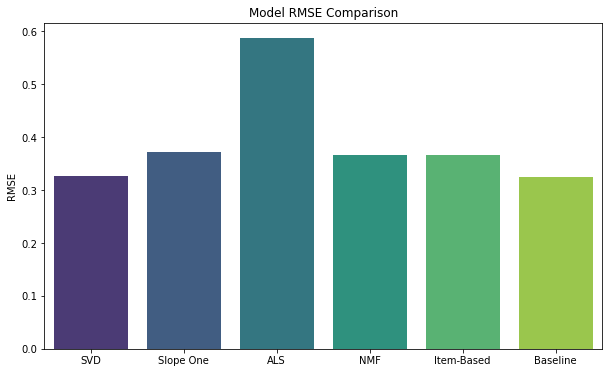

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their RMSE values
models = ['SVD', 'Slope One', 'ALS', 'NMF', 'Item-Based', 'Baseline']
rmse_values = [rmse_svd, rmse_slope_one, rmse_als, rmse_nmf, rmse_item_based, rmse_baseline]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=rmse_values, palette="viridis")
plt.title('Model RMSE Comparison')
plt.ylabel('RMSE')
plt.show()

### MAE values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


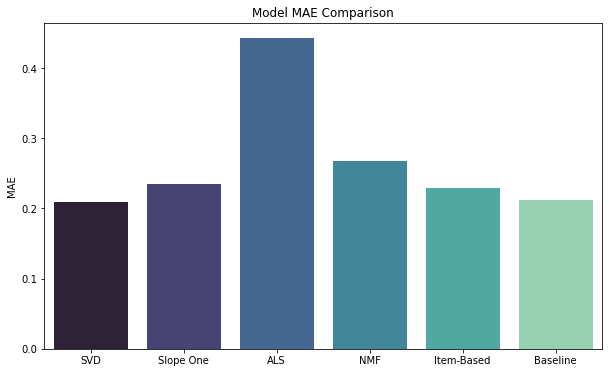

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the models and their MAE values
models = ['SVD', 'Slope One', 'ALS', 'NMF', 'Item-Based', 'Baseline']
mae_values = [mae_svd, mae_slope_one, mae_als, mae_nmf, mae_item_based, mae_baseline]

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=models, y=mae_values, palette="mako")
plt.title('Model MAE Comparison')
plt.ylabel('MAE')
plt.show()

In [65]:
mae_values

/shared/centos7/anaconda3/2021.05/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[0.20864573492263064,
 0.23544598108406314,
 0.4426075381968042,
 0.26725138101917817,
 0.22915778496240521,
 0.2116221817853378]